In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('merge_data_2018_2022.csv')

In [2]:
df = pd.read_csv('merge_data_2018_2022.csv')
df1 = df.loc[df['YEAR'].isin([2018, 2019, 2020,2021,2022]), ['DATETIME', 'PEAKTYPE', 'ERCOT..RTLOAD.',
                                             'ERCOT..WINDDATA.', 'GR_PANHANDLE..WINDDATA.', 'GR_WEST..WINDDATA.',
                                            'CFLATS_UNIT..RTLMP.', 'HB_NORTH..RTLMP.','WAKEWE_ALL..RTLMP.',
                                             'ERCOT..SOLAR_PVGRPP.', 'ERCOT..LOAD_FORECAST.']]

#Additional Features
df1 = df1.set_index('DATETIME')
df1.index = pd.to_datetime(df1.index)
df1['month'] = df1.index.month_name()
df1['quarter'] = df1.index.quarter
df1['hour'] = df1.index.hour
df1['weekday'] = df1.index.day_name()


#Subseting from 2018-04-01 to 2019-03-31
#filt1 = (df1.index>=pd.to_datetime('2018-04-1'))
#df2 = df1.loc[filt1]

#filt2 = (df2.index<=pd.to_datetime('2019-03-31'))
#df2 = df2.loc[filt2]

#Creating Seasons
#df2['date_offset'] = (df2.index.month*100 + df2.index.day - 320)%1300

#df2['season'] = pd.cut(df2['date_offset'], [0, 300, 602, 900, 1300], 
                      #labels=['spring', 'summer', 'fall', 'winter'])
    


df2 = df1.copy()

In [3]:
mlist = [[12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
slist = ['Winter', 'Spring', 'Summer', 'Fall']
sdict = {k: v for v, ks in zip(slist, mlist) for k in ks}
df2['season']=df2.index.month.map(sdict.get)

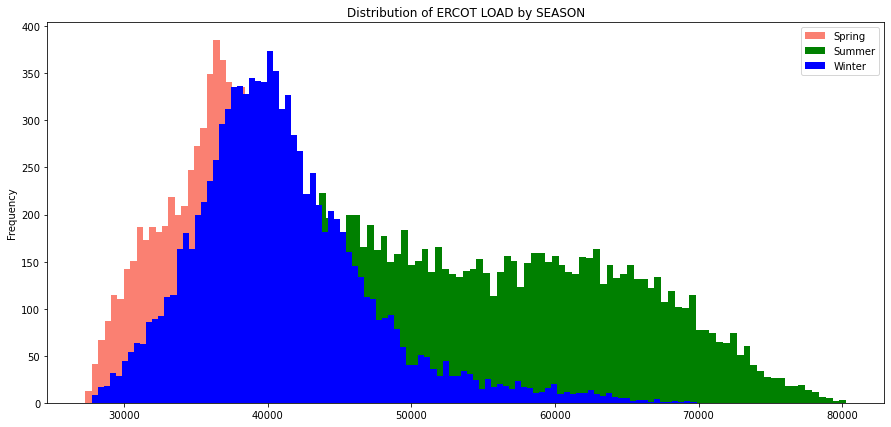

In [4]:
filt1 = df2.loc[df2['season']=='Winter', 'ERCOT..LOAD_FORECAST.']
filt2 = df2.loc[df2['season']=='Spring', 'ERCOT..LOAD_FORECAST.']
filt3 = df2.loc[df2['season']=='Summer', 'ERCOT..LOAD_FORECAST.']
filt4 = df2.loc[df2['season']=='Fall', 'ERCOT..LOAD_FORECAST.']

#"lightpink", "lightsalmon", "lightsteelblue"
ax = filt2.plot.hist(figsize=(15,7),bins=100, label = 'Spring', color = "salmon", title='Distribution of LMP by Node')
ax = filt3.plot.hist(figsize=(15,7),bins=100, label = 'Summer', color = 'green', title='Distribution of LMP by PEAKTYPE')
ax = filt1.plot.hist(figsize=(15,7),bins=100, label = 'Winter', color = "blue",  title='Distribution of ERCOT LOAD by SEASON')
#ax = filt4.plot.hist(figsize=(15,7),bins=100, label = 'Fall', color = "orange", 
                     #title='Distribution of ERCOT LOAD by SEASON')
#ax.set_xlim((-100, 100))
ax.legend()
plt.show()

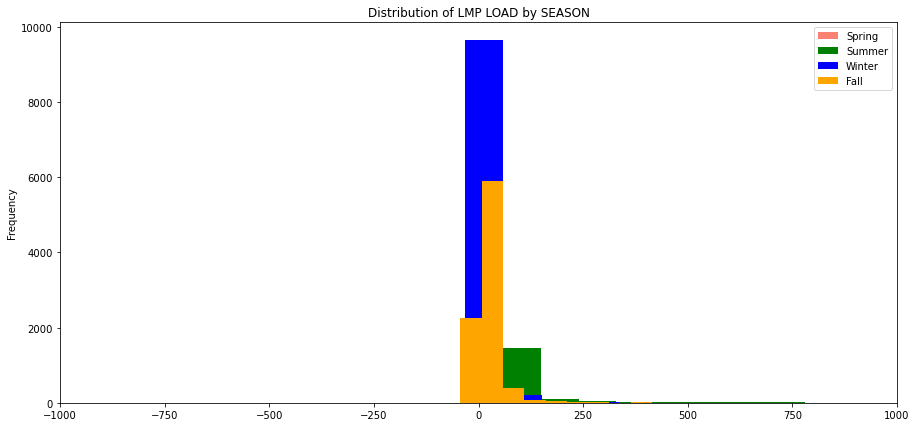

In [5]:

filt1 = df2.loc[df2['season']=='Winter', 'WAKEWE_ALL..RTLMP.']
filt2 = df2.loc[df2['season']=='Spring', 'WAKEWE_ALL..RTLMP.']
filt3 = df2.loc[df2['season']=='Summer', 'WAKEWE_ALL..RTLMP.']
filt4 = df2.loc[df2['season']=='Fall', 'WAKEWE_ALL..RTLMP.']

#"lightpink", "lightsalmon", "lightsteelblue"
ax = filt2.plot.hist(figsize=(15,7),bins=100, label = 'Spring', color = "salmon", title='Distribution of LMP by Node')
ax = filt3.plot.hist(figsize=(15,7),bins=100, label = 'Summer', color = 'green', title='Distribution of LMP by PEAKTYPE')
ax = filt1.plot.hist(figsize=(15,7),bins=100, label = 'Winter', color = "blue",  title='Distribution of LMP by Node')
ax = filt4.plot.hist(figsize=(15,7),bins=100, label = 'Fall', color = "orange", 
                     title='Distribution of LMP LOAD by SEASON')
ax.set_xlim((-1000, 1000))
ax.legend()
plt.show()

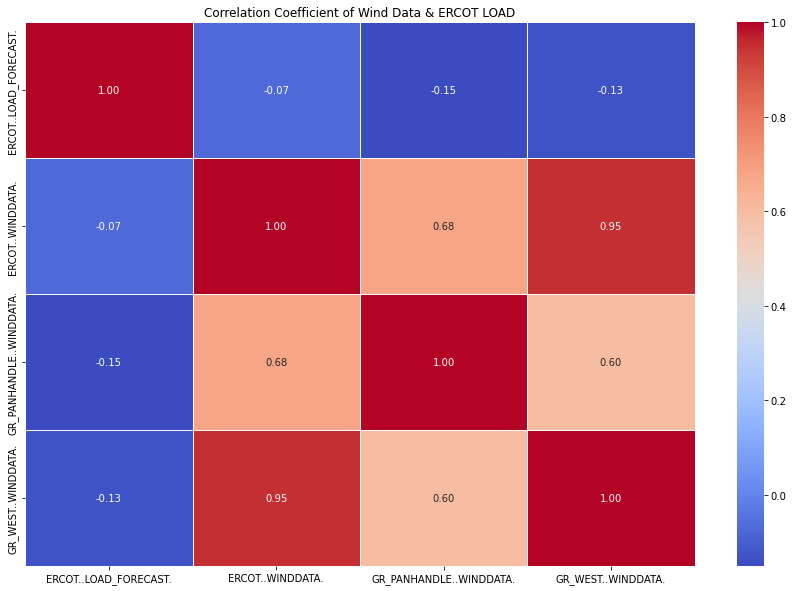

In [6]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
corr = df2[['ERCOT..LOAD_FORECAST.','ERCOT..WINDDATA.', 'GR_PANHANDLE..WINDDATA.', 'GR_WEST..WINDDATA.']].corr()
sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f', linewidths=.5)
plt.title('Correlation Coefficient of Wind Data & ERCOT LOAD')
plt.show()

In [7]:
df['PEAKTYPE'].value_counts()

WDPEAK     19056
OFFPEAK    13607
WEPEAK      8160
Name: PEAKTYPE, dtype: int64

67.39492718828708
40.61461545528032
38.90929350490194


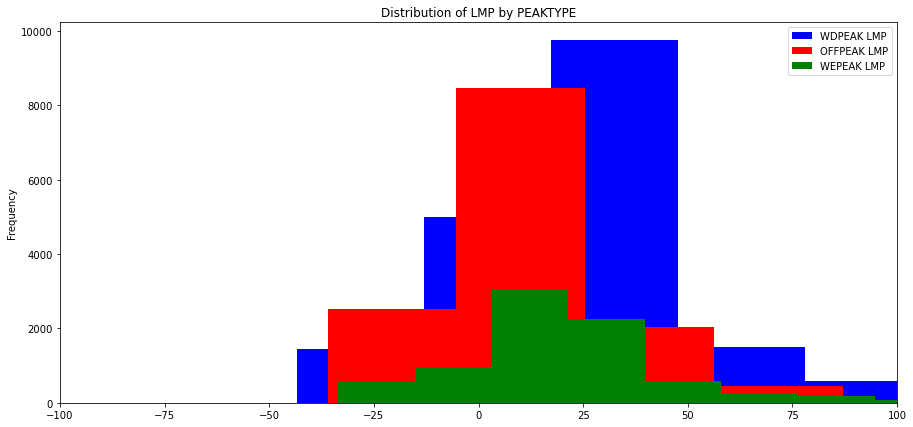

In [9]:
filt1 = df2.loc[df2['PEAKTYPE']=='WDPEAK', 'WAKEWE_ALL..RTLMP.']
filt2 = df2.loc[df2['PEAKTYPE']=='OFFPEAK', 'WAKEWE_ALL..RTLMP.']
filt3 = df2.loc[df2['PEAKTYPE']=='WEPEAK', 'WAKEWE_ALL..RTLMP.']

ax = filt1.plot.hist(figsize=(15,7),bins=300, label = 'WDPEAK LMP', color = 'blue',  title='Distribution of LMP by Node')
ax = filt2.plot.hist(figsize=(15,7),bins=300, label = 'OFFPEAK LMP', color = 'red', title='Distribution of LMP by Node')
ax = filt3.plot.hist(figsize=(15,7),bins=300, label = 'WEPEAK LMP', color = 'green', title='Distribution of LMP by PEAKTYPE')
ax.set_xlim((-100, 100))
ax.legend()

print(filt1.mean())
print(filt2.mean())
print(filt3.mean())

plt.show()

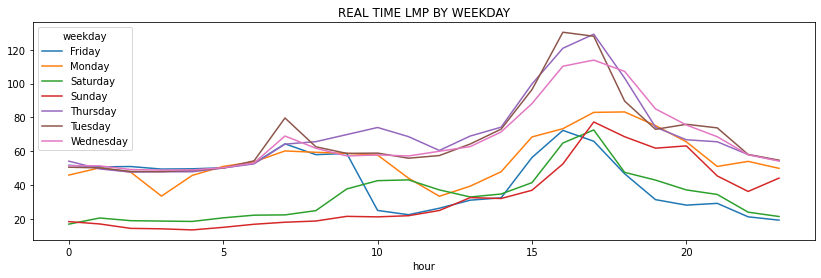

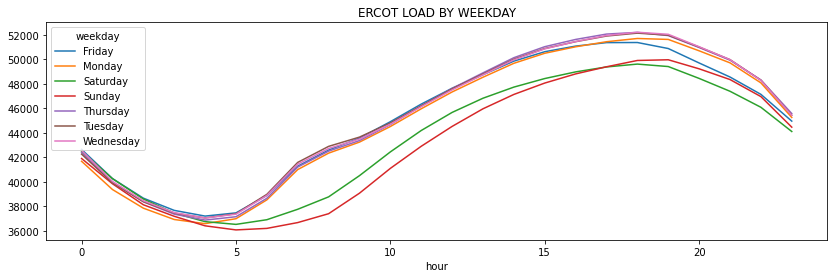

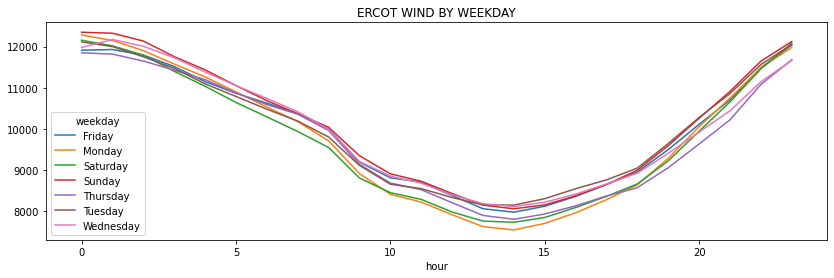

In [9]:
_ = df2.pivot_table(index=df2['hour'], 
                     columns='weekday', 
                     values='WAKEWE_ALL..RTLMP.' ,
                     aggfunc='mean').plot(figsize=(14,4),
                     title='REAL TIME LMP BY WEEKDAY')
_ = df2.pivot_table(index=df2['hour'], 
                     columns='weekday', 
                     values='ERCOT..RTLOAD.',
                     aggfunc='mean').plot(figsize=(14,4), title='ERCOT LOAD BY WEEKDAY')
_ = df2.pivot_table(index=df2['hour'], 
                     columns='weekday', 
                     values='ERCOT..WINDDATA.',
                     aggfunc='mean').plot(figsize=(14,4), title='ERCOT WIND BY WEEKDAY')